# Part A - Classification Tree (50 points)

## A-1 Data Processing and EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#1 Read the data
train_data = pd.read_csv("data_train.csv")
test_data = pd.read_csv('data_test.csv')

In [3]:
#2 Print the training data
train_data

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001518,Male,Yes,1,Graduate,No,1538,1425.0,30.0,360.0,1.0,Urban,Y
1,1,LP002734,Male,Yes,0,Graduate,No,6133,3906.0,324.0,360.0,1.0,Urban,Y
2,2,LP002697,Male,No,0,Graduate,No,4680,2087.0,NaN,360.0,1.0,Semiurban,N
3,3,LP002455,Male,Yes,2,Graduate,No,3859,0.0,96.0,360.0,1.0,Semiurban,Y
4,4,LP001732,Male,Yes,2,Graduate,NaN,5000,0.0,72.0,360.0,0.0,Semiurban,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,486,LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
487,487,LP002958,Male,No,0,Graduate,No,3676,4301.0,172.0,360.0,1.0,Rural,Y
488,488,LP001768,Male,Yes,0,Graduate,NaN,3716,0.0,42.0,180.0,1.0,Rural,Y
489,489,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N


In [4]:
train_data.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001518,Male,Yes,1,Graduate,No,1538,1425.0,30.0,360.0,1.0,Urban,Y
1,1,LP002734,Male,Yes,0,Graduate,No,6133,3906.0,324.0,360.0,1.0,Urban,Y
2,2,LP002697,Male,No,0,Graduate,No,4680,2087.0,NaN,360.0,1.0,Semiurban,N
3,3,LP002455,Male,Yes,2,Graduate,No,3859,0.0,96.0,360.0,1.0,Semiurban,Y
4,4,LP001732,Male,Yes,2,Graduate,NaN,5000,0.0,72.0,360.0,0.0,Semiurban,N


## Description of the dataset
<font size = "4" > The data looks like it's a mix of both categorical and continuous data. There are 491 rows and 14 columns. Out of these 14 columns, 1 column is the serial number column, 5 columns are continuous(numerical data) and 8 other columns have categorical data, where the last column is the target variable. </font>

In [5]:
#3 Shape of the data
train_data.shape

(491, 14)

In [6]:
#4 Missing Values
train_data.isnull()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,False,False,False,False,False,False,False,False,False,False,True,False,False,False
487,False,False,False,False,False,False,False,False,False,False,False,False,False,False
488,False,False,False,False,False,False,True,False,False,False,False,False,False,False
489,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
# Number of missing values 
train_data.isnull().sum()

Unnamed: 0            0
Loan_ID               0
Gender               12
Married               3
Dependents           13
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           17
Loan_Amount_Term     12
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

<font size="4"> Yes, there are missing values. 12 values from Gender, 3 from Married, 13 from Dependents, 29 from Self_Employed, 17 from LoanAmount, 12 from Loan_Amount_term, and 43 from Credit_History columns are missing respectively.</font>

In [8]:
# Drop the missing values
train_data = train_data.dropna()

<font size="4">As the number of missing values is small, the missing data is dropped. </font>

In [9]:
#5 Extract the features and the label from the data
X_train = train_data.drop(columns = ['Loan_Status', 'Unnamed: 0'], axis=1)
y_train = train_data["Loan_Status"]
test_data = test_data.drop(columns = [ 'Unnamed: 0'], axis=1)

<font size="4"> As the 'Unnamed: 0' column is of no use in the training of the data, it is dropped.</font>

<Figure size 1200x1000 with 0 Axes>

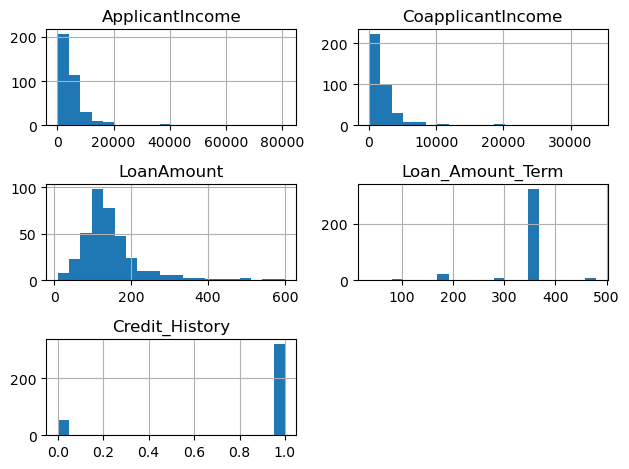

In [10]:
#6 Plot histograms of all features
plt.figure(figsize=(12, 10))
X_train.hist(bins=20)
plt.tight_layout()
plt.show()

In [11]:
#7 Identify feature types
feature_types = X_train.dtypes
print("Feature Types:")
print(feature_types)

Feature Types:
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object


In [12]:
# We can distinguish between continuous and categorical features by examining their data types.

# Continuous features
continuous_features = X_train.select_dtypes(include=["float64", "int64"]).columns.tolist()

# Categorical features
categorical_features = X_train.select_dtypes(include=["object"]).columns.tolist()

print("Continuous Features:", continuous_features)
print("Categorical Features:", categorical_features)

Continuous Features: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Categorical Features: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


<font size="4">The dataset contains both continuous and categorical data. Though the model can work with continuous data, it cannot understand the categorical data. Here, Gender,	Married,	Dependents,	Education,	Self_Employed, and	Property_Area are the categorical features which need to be transformed using feature encoding.</font>

<font size="4">Used the one-hot encoder technique to preserve the existing information while converting it into a form easily understood by the model. Also converted the 'Loan_ID' column into numeric form.</font>

In [13]:
X_train['Loan_ID'] = X_train['Loan_ID'].apply(lambda x: int(x[2:]))
encoded_X_train = pd.get_dummies(X_train, dtype = int)

test_data['Loan_ID'] = test_data['Loan_ID'].apply(lambda x: int(x[2:]))
X_test= pd.get_dummies(test_data, dtype = int)

In [14]:
encoded_X_train

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1518,1538,1425.0,30.0,360.0,1.0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
1,2734,6133,3906.0,324.0,360.0,1.0,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1
3,2455,3859,0.0,96.0,360.0,1.0,0,1,0,1,...,0,1,0,1,0,1,0,0,1,0
5,1841,2583,2167.0,104.0,360.0,1.0,0,1,1,0,...,0,0,0,0,1,0,1,1,0,0
6,2348,5829,0.0,138.0,360.0,1.0,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,1508,11757,0.0,187.0,180.0,1.0,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
483,1974,5000,0.0,132.0,360.0,1.0,1,0,1,0,...,0,0,0,1,0,1,0,1,0,0
485,1179,4616,0.0,134.0,360.0,1.0,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
487,2958,3676,4301.0,172.0,360.0,1.0,0,1,1,0,...,0,0,0,1,0,1,0,1,0,0


In [15]:
y_train=y_train.map({'Y': 1, 'N': 0})

In [16]:
y_train

0      1
1      1
3      1
5      1
6      1
      ..
482    1
483    1
485    0
487    1
489    0
Name: Loan_Status, Length: 373, dtype: int64

<font size="4">Converted the label to have values 0 and 1, instead of Y and N</font>

## A-2 Implementation

In [17]:
#1

class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        
        # for leaf node
        self.value = value

In [18]:
class DecisionTreeClassifier():
    def __init__(self, min_samples_split, max_depth):

        self.root = None

        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth=0):
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["info_gain"]>0:
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])
            
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        
        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")
        
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            for threshold in possible_thresholds:
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if children are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y)
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child):
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        return gain

    def gini_index(self, y):
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini
        
    def calculate_leaf_value(self, Y):
        Y = list(Y)
        return max(Y, key=Y.count)
    
    def fit(self, X, Y):
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
    
    def predict(self, X):
        preditions = [int(self.make_prediction(x, self.root)) for x in X]
        return preditions
    
    def make_prediction(self, x, tree):
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

In [19]:
X = pd.DataFrame(encoded_X_train)
Y = pd.DataFrame(y_train)

In [20]:
data = pd.concat([X,Y], axis =1)

In [21]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values.reshape(-1,1)

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=.3, random_state=42)

In [22]:
DTClassifier = DecisionTreeClassifier(min_samples_split=3, max_depth=3)
DTClassifier.fit(X_train,Y_train)

In [23]:
#2 Validate the trained model with the validation data
y_pred_dt = DTClassifier.predict(X_val) 

In [24]:
X_val

array([[1.925e+03, 2.600e+03, 1.717e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.112e+03, 3.667e+03, 1.459e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.993e+03, 3.762e+03, 1.666e+03, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [2.281e+03, 3.033e+03, 1.459e+03, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.098e+03, 3.500e+03, 1.667e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.515e+03, 3.450e+03, 2.079e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [25]:
X_test = X_test.iloc[:, :].values

In [26]:
#X_test

In [27]:
#3 Inference on the test data
y_test_pred = DTClassifier.predict(X_test)
DTClassifier_predicted_df = pd.DataFrame(y_test_pred)

## Part B - Boosting (30 points)


In [28]:
# 1

import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score

def train_XGBoost(X_train, y_train):
    lambda_params = [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]
    results = {}
    for param in lambda_params:
        clf = xgb.XGBClassifier(reg_lambda=param)
        cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=40)
        auc_scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='roc_auc')
        results[param] = np.mean(auc_scores)
    return results


<font size="4"> The above function takes into account the different lambda values and trains the XGBoost model based on these values. The result is a dictionary that returns the lambda values and the corresponding AUC scores obtained from training these values. Used cross-validation to evaluate the performance of different lambda values. The lambda value for which the highest AUC score is obtained is used to train the model and test it on validation data. </font>

In [29]:
results = train_XGBoost(X_train, Y_train)
print("Mean AUC for Different Lambda Values:", results)
best_lambda = max(results, key=results.get)
print("Best Lambda Value:", best_lambda)

# Train the model with the best lambda value
best_xgb_clf = xgb.XGBClassifier(reg_lambda=best_lambda)
best_xgb_clf.fit(X_train, Y_train)

# Evaluate the model on the val dataset
y_pred_xgb = best_xgb_clf.predict_proba(X_val)[:, 1]

auc_val = roc_auc_score(Y_val, y_pred_xgb)
print("AUC on Val Data with Best Lambda:", auc_val)

# Convert predicted probabilities to binary predictions (0 or 1)
y_pred_xgb_binary = [1 if pred >= 0.5 else 0 for pred in y_pred_xgb]

# Calculate accuracy
accuracy_xgb = accuracy_score(Y_val, y_pred_xgb_binary)

print("Accuracy:", accuracy_xgb)



Mean AUC for Different Lambda Values: {0.001: 0.7511574074074073, 0.01: 0.7367238562091505, 0.1: 0.7440359477124183, 1: 0.756576797385621, 10.0: 0.7533587509077705, 100.0: 0.7459286492374728, 1000.0: 0.7108115468409586}
Best Lambda Value: 1
AUC on Val Data with Best Lambda: 0.6953405017921147
Accuracy: 0.7767857142857143


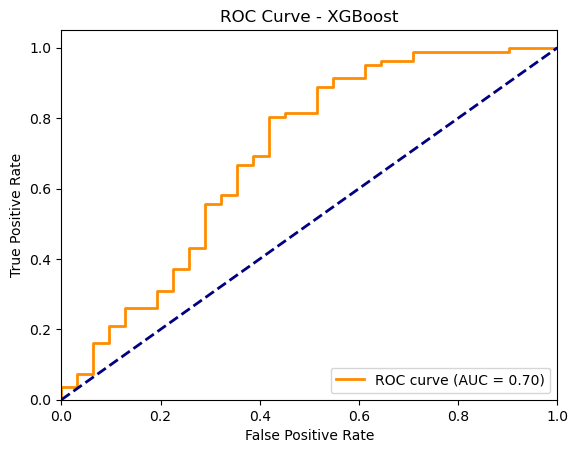

Area under the ROC curve (AUC): 0.6953405017921147


In [30]:
from sklearn.metrics import roc_curve, auc

# Calculate false positive rate (fpr) and true positive rate (tpr)
fpr, tpr, thresholds = roc_curve(Y_val, y_pred_xgb)

# Calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc="lower right")
plt.show()

print("Area under the ROC curve (AUC):", roc_auc)


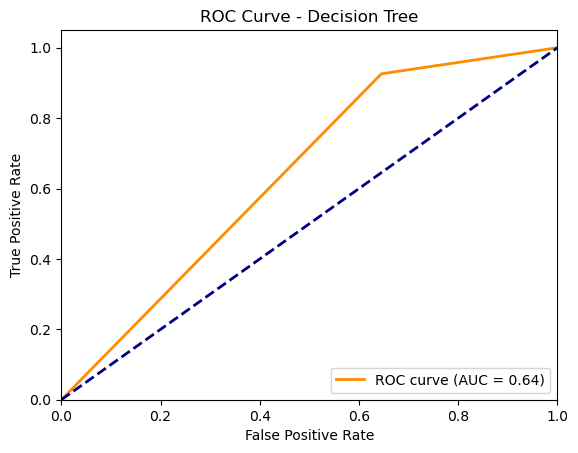

Area under the ROC curve (AUC): 0.6403823178016727


In [31]:
from sklearn.metrics import roc_curve, auc

# Calculate false positive rate (fpr) and true positive rate (tpr)
fpr, tpr, thresholds = roc_curve(Y_val, y_pred_dt)

# Calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

print("Area under the ROC curve (AUC):", roc_auc)

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score

# For Decision Tree Classifier
accuracy_dt = accuracy_score(Y_val, y_pred_dt)
auc_dt = roc_auc_score(Y_val, y_pred_dt)
precision_dt = precision_score(Y_val, y_pred_dt)
recall_dt = recall_score(Y_val, y_pred_dt)
f1_dt = f1_score(Y_val, y_pred_dt)

print("Decision Tree Classifier:")
print("AUC:", auc_dt)
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-score:", f1_dt)

# For XGBoost classifier 
accuracy_xgb = accuracy_score(Y_val, y_pred_xgb_binary)
precision_xgb = precision_score(Y_val, y_pred_xgb_binary)
recall_xgb = recall_score(Y_val, y_pred_xgb_binary)
f1_xgb = f1_score(Y_val, y_pred_xgb_binary)

print("\nXGBoost Classifier:")
print("AUC with Best Lambda:", auc_val)
print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1-score:", f1_xgb)

Decision Tree Classifier:
AUC: 0.6403823178016727
Accuracy: 0.7678571428571429
Precision: 0.7894736842105263
Recall: 0.9259259259259259
F1-score: 0.8522727272727273

XGBoost Classifier:
AUC with Best Lambda: 0.6953405017921147
Accuracy: 0.7767857142857143
Precision: 0.8111111111111111
Recall: 0.9012345679012346
F1-score: 0.8538011695906432


<font size="4">
The XGBoost Classifier performs slightly better than the Decision Tree Classifier based on the evaluation metrics - AUC, Accuracy, Precision, Recall, and F1-score. It can also be observed that though the accuracy of both the classifiers is 0.78 and 0.77, the AUC value is only around 0.70 and 0.64 on XGBoost and Decision Tree respectively. This happens when the dataset is imbalanced and one class dominates the other. The accuracy is high because the dominating class is predicted most of the times. Whereas, the AUC-ROC considers the ability of the model to correctly rank the instances of different classes.  
</font>

In [33]:
# Find the count of unique labels in Train data 
unique_elements, counts = np.unique(Y_train, return_counts=True)
print("Count of each label in train data:")
# Print unique elements and their counts
for element, count in zip(unique_elements, counts):
    print(f"{element}: {count}")

Count of each label in train data:
0: 86
1: 175


In [34]:
# Find the count of unique labels in Val data 
unique_elements, counts = np.unique(Y_val, return_counts=True)
print("Count of each label in val data :")
for element, count in zip(unique_elements, counts):
    print(f"{element}: {count}")

Count of each label in val data :
0: 31
1: 81


In [35]:
# Part A-2 -> 4th ques and Part B -> 5th ques 

predictions_df = pd.DataFrame({'pred_tree': y_pred_dt, 'pred_xgboost': y_pred_xgb_binary})

# Saving the DataFrame to a CSV file
predictions_df.to_csv("Apurva_Mandalika_preds.csv", index=False)